# Read .eeg files and convert to .h5
For import to MATLAB and Python
Script performs the following:
- Read .edf file
- Select only EEG channels/discard EOG, EMG
- Reference to the common average
- Filter DC offset and 60hz notch
- Export to .h5

In [1]:
import os
import numpy as np
import mne
import pathlib
import matplotlib.pyplot as plt

In [2]:
path=pathlib.Path('/media/tris/Wilson-HDD/ds002338-download/sub-xp201/eeg')
path

PosixPath('/media/tris/Wilson-HDD/ds002338-download/sub-xp201/eeg')

In [3]:
subject = 1
raw=mne.io.read_raw_brainvision('/media/tris/Wilson-HDD/ds002338-download/sub-xp201/eeg/sub-xp201_task-1dNF_run-01_eeg.vhdr')
raw.load_data()

Extracting parameters from /media/tris/Wilson-HDD/ds002338-download/sub-xp201/eeg/sub-xp201_task-1dNF_run-01_eeg.vhdr...
Setting channel info structure...
Reading 0 ... 1801299  =      0.000 ...   360.260 secs...


<RawBrainVision | sub-xp201_task-1dNF_run-01_eeg.eeg, 64 x 1801300 (360.3 s), ~879.7 MB, data loaded>

In [4]:
raw.ch_names

['Fp1',
 'Fp2',
 'F3',
 'F4',
 'C3',
 'C4',
 'P3',
 'P4',
 'O1',
 'O2',
 'F7',
 'F8',
 'T7',
 'T8',
 'P7',
 'P8',
 'Fz',
 'Cz',
 'Pz',
 'Oz',
 'FC1',
 'FC2',
 'CP1',
 'CP2',
 'FC5',
 'FC6',
 'CP5',
 'CP6',
 'TP9',
 'TP10',
 'POz',
 'ECG',
 'F1',
 'F2',
 'C1',
 'C2',
 'P1',
 'P2',
 'AF3',
 'AF4',
 'FC3',
 'FC4',
 'CP3',
 'CP4',
 'PO3',
 'PO4',
 'F5',
 'F6',
 'C5',
 'C6',
 'P5',
 'P6',
 'AF7',
 'AF8',
 'FT7',
 'FT8',
 'TP7',
 'TP8',
 'PO7',
 'PO8',
 'FT9',
 'FT10',
 'Fpz',
 'CPz']

In [5]:
eeg_channels=raw.ch_names[0:28] #first 64 channels are the EEG ones
eeg_channels.append(raw.ch_names[37])
eeg_channels.append(raw.ch_names[38])
eeg_channels.append(raw.ch_names[43])
eeg_channels.append(raw.ch_names[44])

eeg_channels

['Fp1',
 'Fp2',
 'F3',
 'F4',
 'C3',
 'C4',
 'P3',
 'P4',
 'O1',
 'O2',
 'F7',
 'F8',
 'T7',
 'T8',
 'P7',
 'P8',
 'Fz',
 'Cz',
 'Pz',
 'Oz',
 'FC1',
 'FC2',
 'CP1',
 'CP2',
 'FC5',
 'FC6',
 'CP5',
 'CP6',
 'P2',
 'AF3',
 'CP4',
 'PO3']

In [6]:
raw.pick_channels(eeg_channels) #select only the EEG channels

<RawBrainVision | sub-xp201_task-1dNF_run-01_eeg.eeg, 32 x 1801300 (360.3 s), ~439.8 MB, data loaded>

In [7]:
df=raw.to_data_frame()
df.to_hdf('/media/tris/Wilson-HDD/ds002338-download/derivatives/preproc_eeg_h5/test_fMRI_raw.h5',key='df')

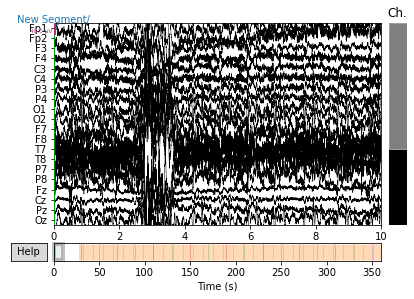

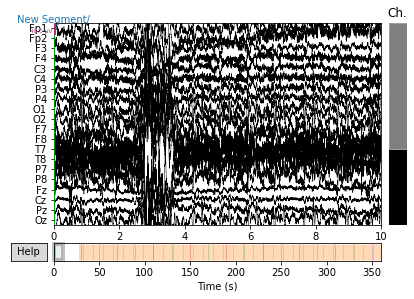

In [8]:
raw.plot()

EEG channel type selected for re-referencing
Applying average reference.
Applying a custom EEG reference.


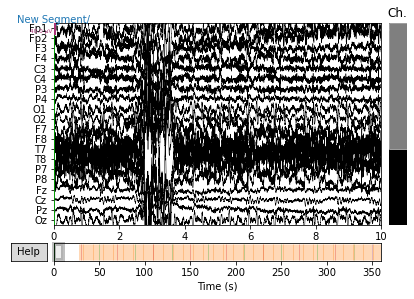

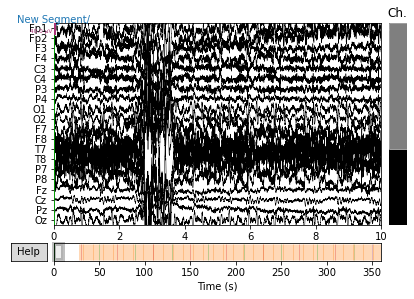

In [9]:
raw_avg=raw.copy().set_eeg_reference(ref_channels='average') #reference to the average (I think is more stable)
raw_avg.plot()

In [10]:
downs_avg=raw_avg.resample(256)

Effective window size : 8.000 (s)


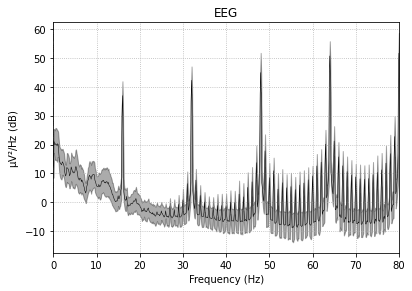

In [13]:
fig = downs_avg.plot_psd(tmax=np.inf, fmax=80, average=True) #check orginal PSD

In [14]:
ssp_projectors = raw.info['projs']
raw.del_proj()

<RawBrainVision | sub-xp201_task-1dNF_run-01_eeg.eeg, 32 x 1801300 (360.3 s), ~439.8 MB, data loaded>

In [15]:
downs_avg.filter(4,50, fir_design='firwin')

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 4 - 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 4.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 3.00 Hz)
- Upper passband edge: 50.00 Hz
- Upper transition bandwidth: 12.50 Hz (-6 dB cutoff frequency: 56.25 Hz)
- Filter length: 423 samples (1.652 sec)



<RawBrainVision | sub-xp201_task-1dNF_run-01_eeg.eeg, 32 x 92227 (360.3 s), ~22.6 MB, data loaded>

Effective window size : 8.000 (s)


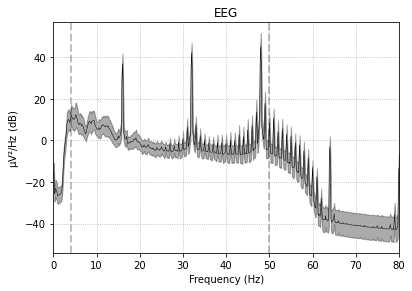

In [16]:
fig = downs_avg.plot_psd(tmax=np.inf, fmax=80, average=True) #check orginal PSD

Effective window size : 8.000 (s)


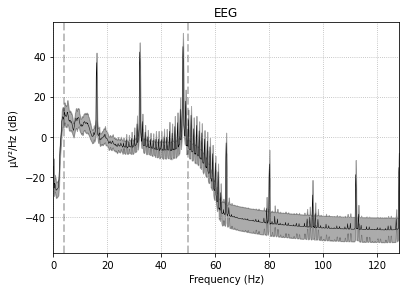

In [17]:
avg_psd=downs_avg.plot_psd(average=True)

In [18]:
df=downs_avg.to_data_frame()

In [19]:
df.to_hdf('/media/tris/Wilson-HDD/ds002338-download/derivatives/preproc_eeg_h5/test_fMRI.h5',key='df')

In [20]:
# for n in range (100,110):
#     for i in range (1,10):
#         raw=mne.io.read_raw_edf('/media/tris/tris_files/EEG_datasets/physionet.org/files/eegmmidb/1.0.0/S'+str(n)+'/S'+str(n)+'R0'+str(i)+'.edf')
#         raw.load_data()
#         eeg_channels=raw.ch_names[0:64] #first 64 channels are the EEG ones
#         raw.pick_channels(eeg_channels) #select only the EEG channels
#         raw_avg=raw.copy().set_eeg_reference(ref_channels='average') #reference to the average (I think is more stable)
#         raw_avg.filter(1.5,50, fir_design='firwin')
#         df=raw_avg.to_data_frame()
#         df.to_hdf('/media/tris/tris_files/EEG_datasets/physionet.org/files/eegmmidb/1.0.0/export_h5/S'+str(n)+'R0'+str(i)+'.h5',key='df')
#     for i in range (10,15):
#         raw=mne.io.read_raw_edf('/media/tris/tris_files/EEG_datasets/physionet.org/files/eegmmidb/1.0.0/S'+str(n)+'/S'+str(n)+'R'+str(i)+'.edf')
#         raw.load_data()
#         eeg_channels=raw.ch_names[0:64] #first 64 channels are the EEG ones
#         raw.pick_channels(eeg_channels) #select only the EEG channels
#         raw_avg=raw.copy().set_eeg_reference(ref_channels='average') #reference to the average (I think is more stable)
#         raw_avg.filter(1.5,50, fir_design='firwin')
#         df=raw_avg.to_data_frame()
#         df.to_hdf('/media/tris/tris_files/EEG_datasets/physionet.org/files/eegmmidb/1.0.0/export_h5/S'+str(n)+'R'+str(i)+'.h5',key='df')
